In [65]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [66]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import skew, kurtosis, boxcox

In [68]:
df = pd.read_csv('../output/house_prices_prediction/temp_data.csv')
df.head()

,Id,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,1,65.0,8450,CollgCr,Norm,Norm,7,5,2003,2003,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,80.0,9600,Veenker,Feedr,Norm,6,8,1976,1976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,68.0,11250,CollgCr,Norm,Norm,7,5,2001,2002,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,60.0,9550,Crawfor,Norm,Norm,7,5,1915,1970,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,84.0,14260,NoRidge,Norm,Norm,8,5,2000,2000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
df_numeric = df.select_dtypes(include='number')
df_numeric.shape

(1453, 231)

<Axes: xlabel='LotFrontage', ylabel='Count'>

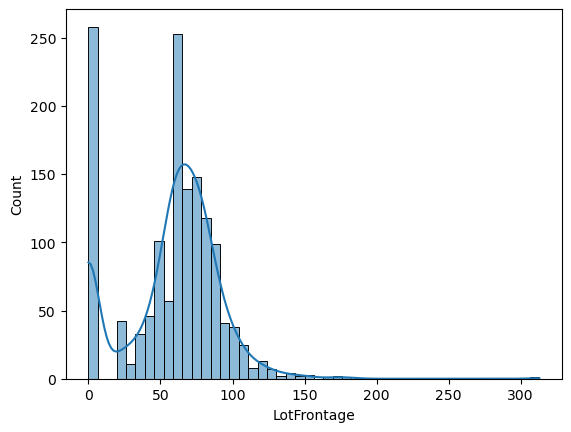

In [70]:
sns.histplot(df_numeric['LotFrontage'], kde=True)

In [71]:
df_numeric['LotFrontage'].describe()

count    1453.000000
mean       57.321404
std        33.868760
min         0.000000
25%        42.000000
50%        63.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [72]:
log_transformed = np.log1p(df_numeric['LotFrontage'])
log_transformed

0       4.189655
1       4.394449
2       4.234107
3       4.110874
4       4.442651
          ...   
1448    4.143135
1449    4.454347
1450    4.204693
1451    4.234107
1452    4.330733
Name: LotFrontage, Length: 1453, dtype: float64

In [73]:
skew(df_numeric['LotFrontage'])

-0.0049672288777894025

In [74]:
skew(log_transformed)

# As can be seen, log transformation is only effective when the data is positively skewed.
# If the log transformation is applied to negatively skewed data, the skewness sometimes increases.

-1.554368654274307

<Axes: xlabel='LotFrontage', ylabel='Count'>

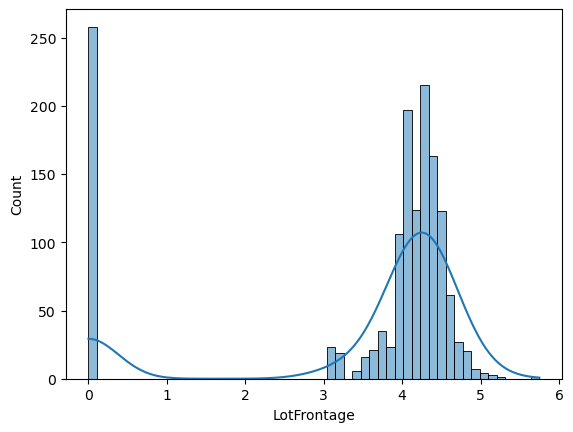

In [75]:
sns.histplot(log_transformed, kde=True)

In [76]:
df_numeric.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,...,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,730.368204,57.321404,10389.060564,6.086717,5.578802,1971.148658,1984.783207,101.080523,435.156228,46.773572,...,0.202340,0.041294,0.011012,0.039917,0.013765,0.035788,0.059876,0.043359,0.006882,0.020647
std,421.996010,33.868760,9741.373971,1.366934,1.110998,30.200682,20.655956,176.564139,428.743644,161.675202,...,0.401883,0.199038,0.104393,0.195833,0.116553,0.185825,0.237339,0.203733,0.082702,0.142248
min,1.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,364.000000,42.000000,7535.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,731.000000,63.000000,9453.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,380.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1095.000000,79.000000,11553.000000,7.000000,6.000000,2000.000000,2004.000000,162.000000,705.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,2188.000000,1474.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
# In LotArea, mean is greater than median, so positive skewness and log transformation should work

skew(df_numeric['MasVnrArea'])

2.6705440677226044

In [78]:
skew(np.log1p(df_numeric['MasVnrArea'])) 
# the skewness has been considerably reduced because of the log transformation

0.507887027388046

<Axes: xlabel='EnclosedPorch', ylabel='Count'>

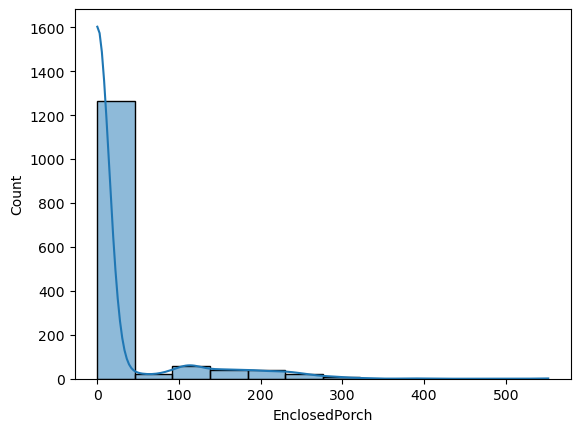

In [79]:
sns.histplot(df_numeric['EnclosedPorch'], kde=True)

<Axes: xlabel='EnclosedPorch', ylabel='Count'>

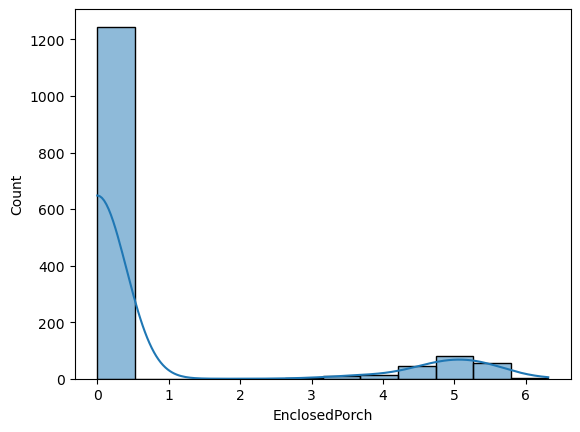

In [80]:
sns.histplot(np.log1p(df_numeric['EnclosedPorch']), kde=True)

In [81]:
# Kurtosis, a statistical measure that describes the shape of the peak and the tails when compared to
# a normal distribution.

In [82]:
kurtosis(df_numeric['LotFrontage'])

1.9619351014490416

<Axes: xlabel='LotFrontage', ylabel='Count'>

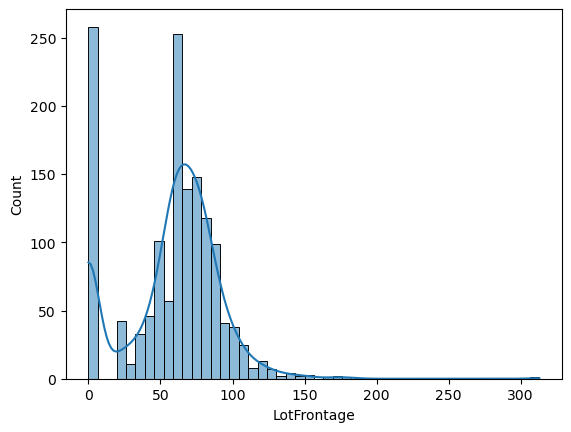

In [83]:
sns.histplot(df_numeric['LotFrontage'], kde=True)

<Axes: xlabel='Street_Pave', ylabel='Count'>

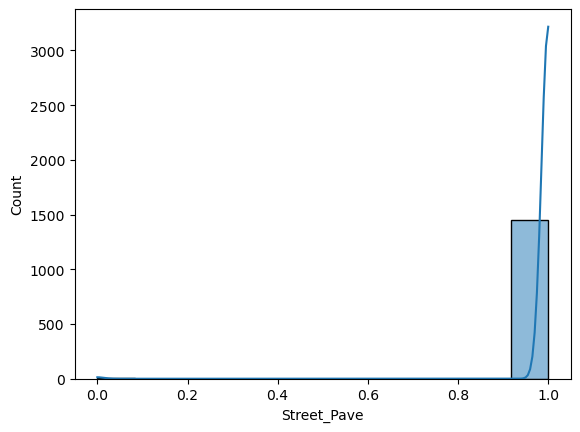

In [84]:
sns.histplot(df_numeric['Street_Pave'], kde=True)

In [85]:
kurtosis(np.log1p(df_numeric['LotFrontage']))

0.6176052188984049

In [86]:
skew_kurtosis_data = []
for col in df_numeric.columns:
    data = df_numeric[col]
    log_transformed = np.log1p(df_numeric[col])
    skew_kurtosis_data.append({
        'name':col,
        'normal_mean': data.mean(),
        'normal_median': data.median(),
        'normal_skew':skew(data),
        'normal_kurtosis': kurtosis(data),
        'ln_mean': log_transformed.mean(),
        'ln_median': log_transformed.median(),
        'ln_skew': skew(log_transformed),
        'ln_kurtosis': kurtosis(log_transformed),
    })

In [87]:
df_skew_kurtosis = pd.DataFrame(skew_kurtosis_data)
df_skew_kurtosis.to_csv('../output/house_prices_prediction/skew_kurtosis_data.csv', index=False, index_label=False)

In [88]:
data_boxcox, best_lambda = boxcox(df_numeric['LotFrontage'] + 1)

In [89]:
best_lambda

0.7619928916219769

In [95]:
df_numeric['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1448    62.0
1449    85.0
1450    66.0
1451    68.0
1452    75.0
Name: LotFrontage, Length: 1453, dtype: float64

In [96]:
data_boxcox

array([30.64190152, 36.03855414, 31.74279295, ..., 31.01016335,
       31.74279295, 34.26844846])

<Axes: xlabel='LotFrontage', ylabel='Count'>

<Axes: ylabel='Count'>

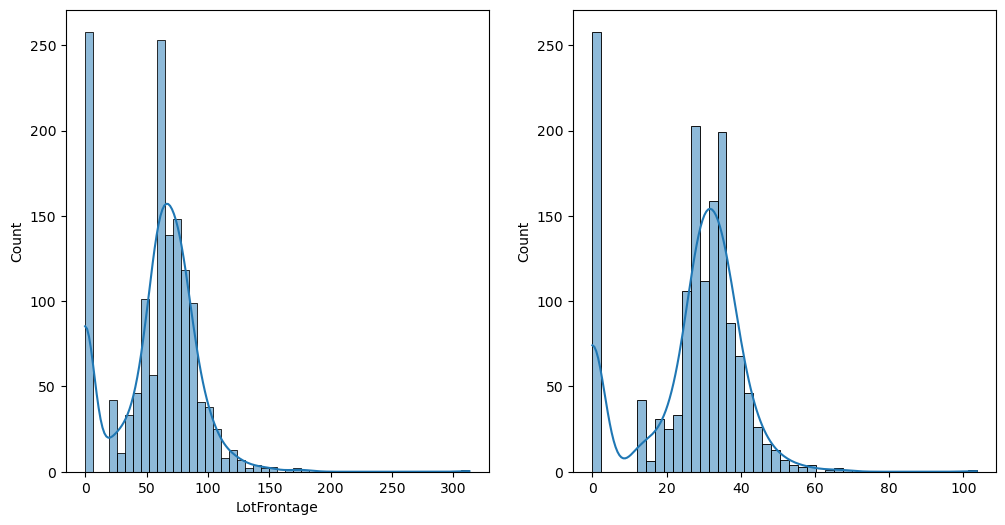

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df_numeric['LotFrontage'], kde=True, ax=ax[0])
sns.histplot(data_boxcox, kde=True, ax=ax[1])
plt.show()

In [91]:
skew(df_numeric['LotFrontage'])
kurtosis(df_numeric['LotFrontage'])

-0.0049672288777894025

1.9619351014490416

In [94]:
skew(data_boxcox)
kurtosis(data_boxcox)

-0.6068024334815213

0.2776775144023742